In [3]:
A = rand(5,5)
B = rand(5,5)

5×5 Matrix{Float64}:
 0.427566   0.926303  0.768389   0.252602    0.068628
 0.963839   0.626034  0.621404   0.720021    0.927462
 0.462503   0.263531  0.0798756  0.996313    0.819039
 0.0877163  0.670902  0.634118   0.00941859  0.664718
 0.438494   0.45174   0.969794   0.0982301   0.551076

In [4]:
A_sym = (A+A')/2

5×5 Matrix{Float64}:
 0.197615  0.544369  0.496345  0.398907  0.488414
 0.544369  0.267222  0.367176  0.354835  0.40733
 0.496345  0.367176  0.380197  0.298756  0.624173
 0.398907  0.354835  0.298756  0.095137  0.319696
 0.488414  0.40733   0.624173  0.319696  0.132158

In [5]:
A_skw = (A-A')

5×5 Matrix{Float64}:
  0.0       -0.425335  -0.515879   0.458266   0.465366
  0.425335   0.0       -0.493954   0.554321   0.362223
  0.515879   0.493954   0.0        0.518249  -0.613547
 -0.458266  -0.554321  -0.518249   0.0        0.394691
 -0.465366  -0.362223   0.613547  -0.394691   0.0

In [6]:
using LinearAlgebra

function asym_idx(A) 
    A_tilde = (A-A') / 2
    a_i = norm(A_tilde) / norm(A)
    return a_i
end

asym_idx (generic function with 1 method)

In [7]:
function skw_mat(A)
    @assert size(A)[1] == size(A)[2] "Matrix must be square"
    @assert round.(A-A', digits=2) == zeros(size(A)[1], size(A)[2]) "Matrix must be symmetric"
    
    skw_mat = copy(A)

    for i in 1:size(A)[1]
        for j in 1:size(A)[1]
            if i < j
                skw_mat[i,j] = -A[i,j]
            end
        end
    end
    return skw_mat
end


skw_mat (generic function with 1 method)

In [8]:
# Random Matrix
ai_1 = asym_idx(A)

0.4690613478086576

In [9]:
# Symmetric Matrix
ai_2 = asym_idx(A_sym)

0.0

In [10]:
ai_2 = asym_idx(A_skw)

1.0

In [11]:
# Formula to blend between symmetric and assymetric matrices
function skew_blend(M_sym, M_skw, proportion)

    @assert 0 <= proportion <= 1

    M = (1 - proportion) * M_sym + proportion * M_skw

    return M

end

skew_blend (generic function with 1 method)

In [12]:
A_skw

5×5 Matrix{Float64}:
  0.0       -0.425335  -0.515879   0.458266   0.465366
  0.425335   0.0       -0.493954   0.554321   0.362223
  0.515879   0.493954   0.0        0.518249  -0.613547
 -0.458266  -0.554321  -0.518249   0.0        0.394691
 -0.465366  -0.362223   0.613547  -0.394691   0.0

In [13]:
X = skew_blend(A_sym, A_skw, .75);
X

5×5 Matrix{Float64}:
  0.0494036  -0.182909   -0.262823    0.443426    0.471128
  0.455094    0.0668054  -0.278672    0.504449    0.3735
  0.510995    0.46226     0.0950491   0.463375   -0.304117
 -0.243972   -0.327032   -0.313997    0.0237843   0.375942
 -0.226921   -0.169835    0.616204   -0.216094    0.0330394

In [14]:
asym_idx(A_skw)

1.0

In [15]:
asym_idx(X)

0.9541245457541365

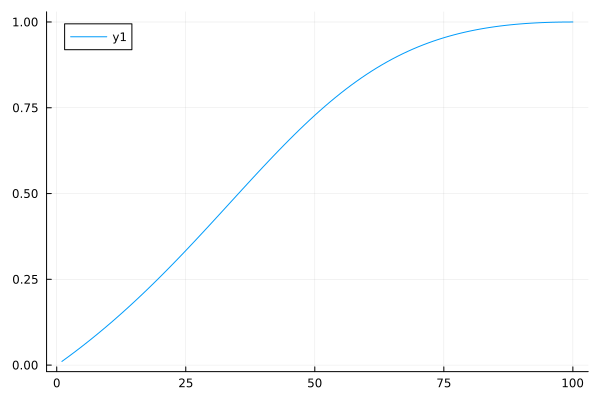

In [16]:
# Test on A matrix

proportion_list = zeros(100)
step = .1

for p = 1:100
    X = skew_blend(A_sym, A_skw, p/100);
    idx = asym_idx(X)
    proportion_list[p] = idx
end

using Plots
plot(proportion_list)

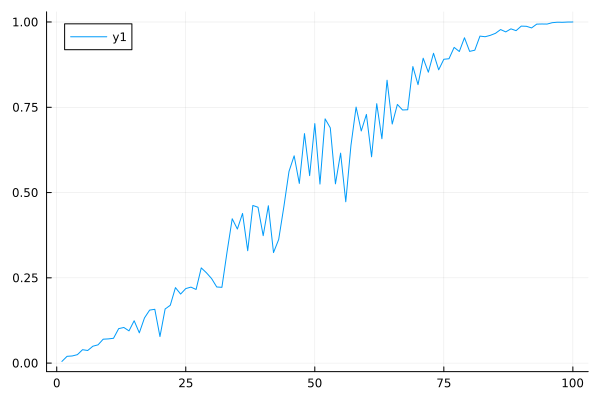

In [17]:
# Test on random matrices
proportion_list = zeros(100)
step = .1

for p = 1:100

    # Generate new matrices
    A = rand(5,5)
    A_sym = (A+A')/2
    A_skw = (A-A')

    # Blend
    X = skew_blend(A_sym, A_skw, p/100);
    idx = asym_idx(X)
    proportion_list[p] = idx
end

plot(proportion_list)

In [18]:
# create 10x10 matrix with Rank 4
size = 10;
tgt_rank = 4;

A = randn(size, tgt_rank) * randn(tgt_rank, size);

rank(A)

# Create an mxn matrix with Rank r

m = 10;
n = 37;
r = 4;

B = randn(m, r) * randn(r, n);


In [27]:
# Test whether matrix rank is invariant to scalar multiplication

for i = 0:.1:1
    A = rand(10,10)
    rank_a = rank(A)
    rank_s = rank(i*A)
    println(rank_a == rank_s)
end

false
true
true
true
true
true
true
true
true
true
true


In [35]:
Af = rand(10, 10)
Ar = rand(10,3) * rand(3,10)
l = 13

println(rank(Af), '\n', rank(Ar))

println(rank(l*Af), '\n', rank(l*Ar))

10
3
10
3
